In [22]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate


In [7]:

fhc_run0 = uproot.open('output_uboone_fhc_run0_set1.root')
numi_numu_flux = fhc_run0['numu/Detsmear/numu_CV_AV_TPC_2D;1']
numi_numu_enu_L = fhc_run0['numu/Detsmear/Enu_Baseline_numu_CV_TPC;1']
numi_numu_angle = fhc_run0['numu/Detsmear/Th_numu_CV_TPC;1']

NuMI_energies_positions, Enu_bin_edges, baseline_bin_edges = numi_numu_enu_L.to_numpy()
NuMI_fluxes, energy_bin_edges, angle_bin_edges = numi_numu_flux.to_numpy()
NuMI_angle_dist, angle_dist_edges = numi_numu_angle.to_numpy()

# As defined in uboone docdb 12290
uBNuMIGlobalTimeOffset = 4687.5
uBNuMIRandomTimeOffset = 9600

NuMI_energy_nu = (Enu_bin_edges[1:]+Enu_bin_edges[:-1])/2
NuMI_enu_max = np.max(NuMI_energy_nu)
NuMI_distances_nu = (baseline_bin_edges[1:]+baseline_bin_edges[:-1])/2
NuMI_energy_nu_bins = Enu_bin_edges[:-1]
NuMI_e_bins_angle = energy_bin_edges[:-1]
NuMI_th_bins_angle = angle_bin_edges[:-1]
NuMI_e_vs_dist = NuMI_energies_positions[:,:]



/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_25447/717188567.py:9: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interpolate.interp2d(x, z, weights)
/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_25447/717188567.py:15: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplr

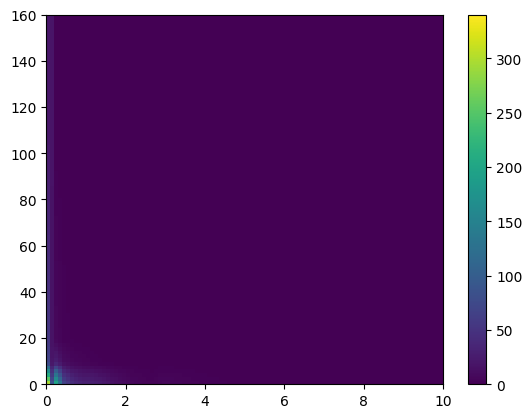

/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_25447/717188567.py:40: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interpolate.interp2d(x, z, weights)
/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_25447/717188567.py:46: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bispl

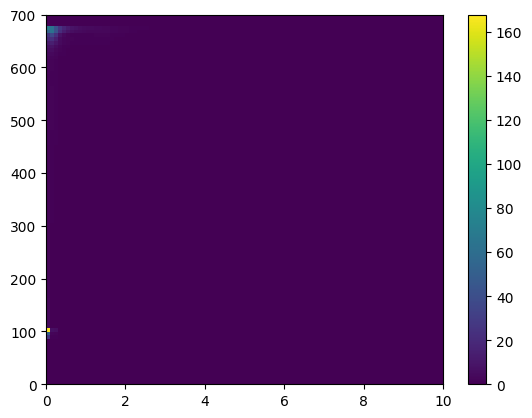

In [20]:

x = NuMI_th_bins_angle
z = NuMI_e_bins_angle

xx, zz = np.meshgrid(x, z)

weights = NuMI_fluxes

# create interpolation object
f = interpolate.interp2d(x, z, weights)

# # generate new ranges of x and z values
angle_arr_interp = np.linspace(np.min(angle_bin_edges),np.max(angle_bin_edges),100)
energy_arr_interp = np.linspace(np.min(energy_bin_edges),np.max(energy_bin_edges),100)
# # interpolate 
NuMI_fluxes_interp = f(angle_arr_interp, energy_arr_interp)

index_x = 100
index_y = 100
x=np.append(0, angle_arr_interp[:index_x]) # gives [ 0  1  5 13]
y=np.append(0,energy_arr_interp[:index_y]) # gives [ 0  2  6 15]

c=np.array(NuMI_fluxes_interp[:index_y, :index_x])

plt.pcolormesh(y, x,  c.T)
plt.colorbar()
plt.show()

# NuMI_energy_nu = (Enu_bin_edges[1:]+Enu_bin_edges[:-1])/2
# NuMI_distances_nu = (baseline_bin_edges[1:]+baseline_bin_edges[:-1])/2
# NuMI_e_vs_dist = NuMI_energies_positions[:,:]

x = NuMI_distances_nu
z = NuMI_energy_nu

xx, zz = np.meshgrid(x, z)

weights = NuMI_e_vs_dist

# create interpolation object
f = interpolate.interp2d(x, z, weights)

# # generate new ranges of x and z values
distances_interp = np.linspace(1,700,100)
energy_dist_interp = np.linspace(0.1,10,100)
# # interpolate 
NuMI_e_vs_dist_interp = f(distances_interp, energy_dist_interp)

index_x = 100
index_y = 100
x=np.append(0, distances_interp[:index_x]) # gives [ 0  1  5 13]
y=np.append(0,energy_dist_interp[:index_y]) # gives [ 0  2  6 15]

c=np.array(NuMI_e_vs_dist_interp[:index_y, :index_x])

plt.pcolormesh(y, x,  c.T)
plt.colorbar()
plt.show()

In [23]:
# Formatting flux files to be saved as .dat
dist_arr = np.array([[0] + list(NuMI_distances_nu)])
dat_arr = np.hstack((np.array([NuMI_energy_nu]).T, NuMI_e_vs_dist))
dat_NuMI_e_vs_dist = np.vstack((dist_arr, dat_arr))
# Interpolated flux
distances_interp_arr = np.array([[0] + list(distances_interp)])
dat_arr = np.hstack((np.array([energy_dist_interp]).T, NuMI_e_vs_dist_interp))
dat_NuMI_e_vs_dist_interp = np.vstack((distances_interp_arr, dat_arr))

# Energy/angle distribution (20,4)
energy_bins = (energy_bin_edges[1:] + energy_bin_edges[:-1] ) / 2
angle_bins = (angle_bin_edges[1:] + angle_bin_edges[:-1] ) / 2
angle_arr = np.array([[0] + list(angle_bins)])
dat_arr = np.hstack((np.array([energy_bins]).T, NuMI_fluxes))
dat_NuMI_energy_angle_dist = np.vstack((angle_arr, dat_arr))
# Interpolated energy/angle distribution (100,100)
angle_arr_interp = np.array([[0] + list(angle_arr_interp)])
dat_arr_interp = np.hstack((np.array([energy_arr_interp]).T, NuMI_fluxes_interp))
dat_NuMI_energy_angle_dist_interp = np.vstack((angle_arr_interp, dat_arr_interp))

# Angle distribution
angle_dist = (angle_dist_edges[1:] + angle_dist_edges[:-1] ) / 2    
dat_NuMI_angle_dist = np.vstack((angle_dist, NuMI_angle_dist))

np.savetxt('NuMI_energy_distances.dat', dat_NuMI_e_vs_dist, delimiter=' ')
np.savetxt('NuMI_angle_energy_normalization.dat', dat_NuMI_energy_angle_dist, delimiter=' ')
np.savetxt('NuMI_angle_flux.dat', dat_NuMI_angle_dist, delimiter=' ')